In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
combo = pd.read_csv('../Data/Combo_4_Full.csv')
combo.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(29909405, 5)

In [4]:
combo.head(3)

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.065455,Debt Consolidation,10+ years,1
1,717.0,0.380000,Business Loan,10+ years,1
2,697.0,0.317460,Home Improvement,10+ years,1


In [5]:
combo.dtypes

Risk_Score            object
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [6]:
emp = combo[['Employment Length']]
emp.value_counts()

Employment Length
< 1 year             23184299
5 years               2419164
10+ years             1164389
None                  1098262
1 year                 416243
2 years                402881
3 years                358097
4 years                258228
6 years                174253
8 years                157879
7 years                148361
9 years                127349
dtype: int64

In [7]:
#Convert Employment Length to Ordinal Feature:
sorted(combo['Employment Length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'None']

In [8]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
 ]

In [9]:
def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

In [10]:
ordinal_encode(combo, 'Employment Length', emp_ordering)

In [11]:
combo = combo.rename(columns={"Accepted":"Loan Application"})

In [12]:
combo['Loan Application'][combo['Loan Application']==1]='Accepted'
combo['Loan Application'][combo['Loan Application']==0]='Rejected'

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_1383/435546756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['Loan Application'][combo['Loan Application']==1]='Accepted'
/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_1383/435546756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combo['Loan Application'][combo['Loan Application']==0]='Rejected'


In [13]:
combo

,Risk_Score,DI,Loan Type,Employment Length,Loan Application
0,677.0,0.065455,Debt Consolidation,11,Accepted
1,717.0,0.380000,Business Loan,11,Accepted
2,697.0,0.317460,Home Improvement,11,Accepted
3,787.0,0.318182,Debt Consolidation,11,Accepted
4,697.0,0.099585,Major Purchase,4,Accepted
...,...,...,...,...,...
29909400,590.0,0.412600,Debt Consolidation,1,Rejected
29909401,None,0.014800,Moving And Relocation,6,Rejected
29909402,686.0,0.102600,Other,1,Rejected
29909403,None,0.177100,Debt Consolidation,1,Rejected


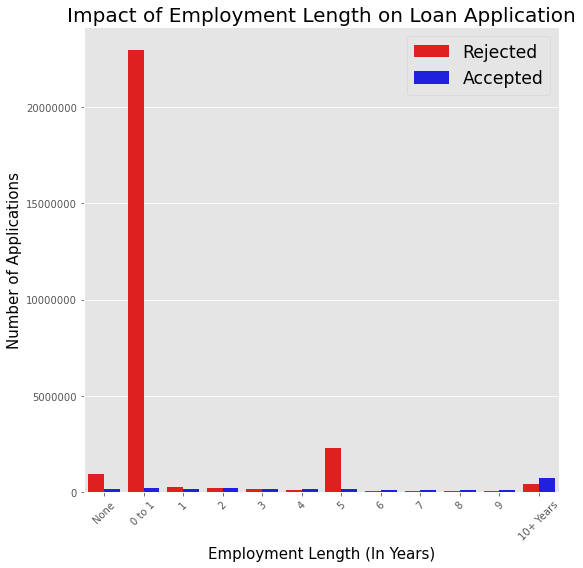

In [14]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.countplot(data=combo, x='Employment Length', 
              hue='Loan Application', hue_order=['Rejected', 'Accepted'],
              palette={'Rejected':'red','Accepted':'blue'}).set_xticklabels(['None', '0 to 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+ Years'], rotation=45)

plt.title('Impact of Employment Length on Loan Application', fontsize=20, color='black')
plt.xlabel('Employment Length (In Years)', fontsize=15, color='black')
plt.ylabel('Number of Applications', fontsize=15, color='black')
plt.ticklabel_format(style='plain', axis='y')

#lg = plt.gcf().legend(title='Loan Applications', loc='center right')
#lg.get_title().set_fontsize(14)
#plt.legend(loc='center', fontsize=15)

#plt.legend(title_fontsize='large')
#plt.rcParams['title_fontsize'] = 15
plt.legend(fontsize='xx-large')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [15]:
#Addtional Images Below for Trial and Error, Unused: 

<Figure size 800x800 with 0 Axes>

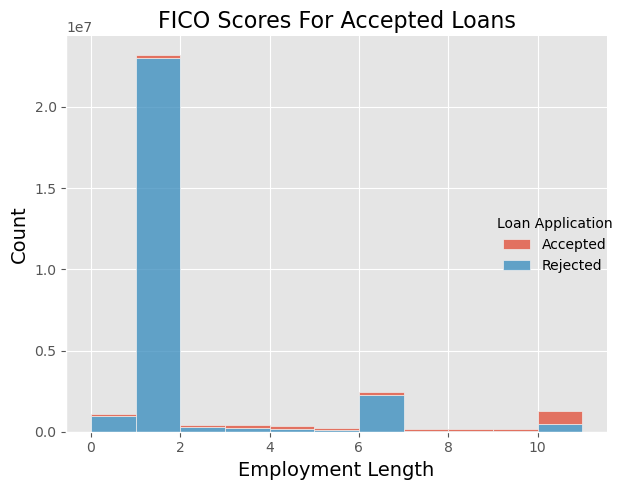

In [16]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.displot(data=combo, x='Employment Length', hue='Loan Application', multiple='stack', bins=11)

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('Employment Length', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [17]:
a = combo[combo['Loan Application']=='Accepted']
a

,Risk_Score,DI,Loan Type,Employment Length,Loan Application
0,677.0,0.065455,Debt Consolidation,11,Accepted
1,717.0,0.380000,Business Loan,11,Accepted
2,697.0,0.317460,Home Improvement,11,Accepted
3,787.0,0.318182,Debt Consolidation,11,Accepted
4,697.0,0.099585,Major Purchase,4,Accepted
...,...,...,...,...,...
2260659,667.0,0.252632,Home Improvement,8,Accepted
2260660,697.0,0.222222,Debt Consolidation,11,Accepted
2260661,707.0,0.176211,Debt Consolidation,10,Accepted
2260662,662.0,0.218182,Debt Consolidation,7,Accepted


<Figure size 800x800 with 0 Axes>

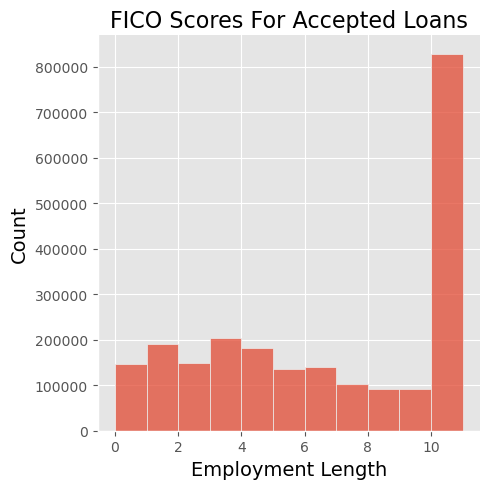

In [18]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.displot(data=a, x='Employment Length', bins=11)

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('Employment Length', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [19]:
r = combo[combo['Loan Application']=='Rejected']
r

,Risk_Score,DI,Loan Type,Employment Length,Loan Application
2260664,693.0,0.1000,Wedding Covered but No Honeymoon,5,Rejected
2260665,703.0,0.1000,Consolidating Debt,1,Rejected
2260666,715.0,0.1000,Want to consolidate my debt,2,Rejected
2260667,698.0,0.3864,waksman,1,Rejected
2260668,509.0,0.0943,mdrigo,1,Rejected
...,...,...,...,...,...
29909400,590.0,0.4126,Debt Consolidation,1,Rejected
29909401,None,0.0148,Moving And Relocation,6,Rejected
29909402,686.0,0.1026,Other,1,Rejected
29909403,None,0.1771,Debt Consolidation,1,Rejected


<Figure size 800x800 with 0 Axes>

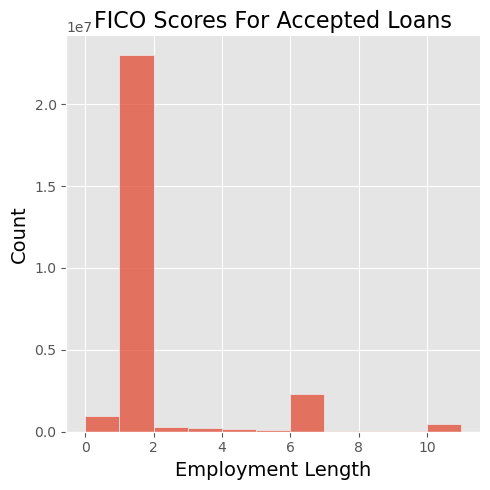

In [20]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.displot(data=r, x='Employment Length', bins=11)

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('Employment Length', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

<Figure size 800x800 with 0 Axes>

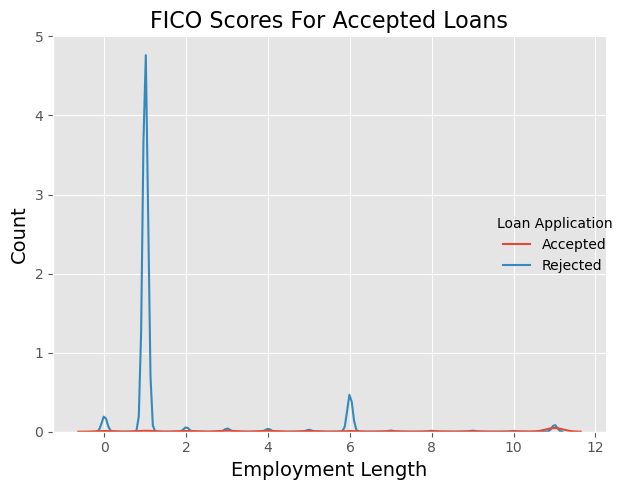

In [21]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.displot(data=combo, x='Employment Length', hue='Loan Application', kind='kde')

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('Employment Length', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

<Figure size 800x800 with 0 Axes>

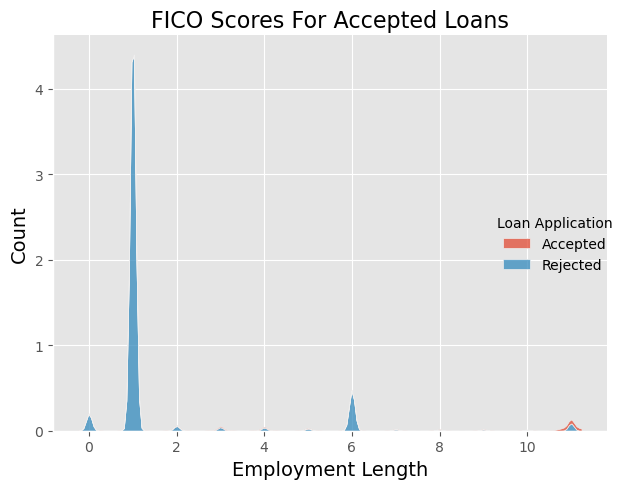

In [22]:
plt.figure(figsize=(8,8))
plt.style.use('default')
plt.style.use('ggplot')

#sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)
sns.displot(data=combo, x='Employment Length', hue='Loan Application', multiple='stack', kind='kde')

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('Employment Length', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [23]:
combo.sample(20)

,Risk_Score,DI,Loan Type,Employment Length,Loan Application
8547548,None,0.2534,Debt Consolidation,1,Rejected
26549236,None,0.1188,Business Loan,6,Rejected
8497826,None,0.0632,Debt Consolidation,1,Rejected
22555560,None,1.0000,Credit Card Refinancing,1,Rejected
12640857,None,0.2941,Credit Card Refinancing,1,Rejected
2796477,504.0,0.0627,Major Purchase,1,Rejected
27642669,552.0,0.6957,Business Loan,1,Rejected
15973455,None,0.0752,Home Purchase,3,Rejected
27578916,None,0.0321,Debt Consolidation,6,Rejected
16433059,None,0.0092,Major Purchase,1,Rejected


In [24]:
combo.dtypes

Risk_Score            object
DI                   float64
Loan Type             object
Employment Length      int64
Loan Application      object
dtype: object